**Download** this file as a Jupyter Notebook@ [http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/ES2.ipynb](http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/ES2.ipynb)

---

# ES-2

Copyright © 2021 Theodore G. Cleveland 

---

## Purpose:
Demonstrate ability to interpret and render from an image a topographic map, and overlay the topographic map onto the basemap.

---

## Background
Figure 1 is a subdivision conceptual map for Somewhere, USA. The numbers on the map are land surface elevations located at the decimal points in the drawing. Along the bottom edge of the map is a black line segment (with arrowheads at each end) that indicates a distance of 1,100 feet on the map. The black circle in the lower left hand corner is to be used as an origin for X-Y measurements for making XYZ data files.

<img src="http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/SomewhereUSABaseMap.png" width="900" ><br>

**Figure 1.  Somewhere USA Study Area**


The semester design project is the conceptual design and analysis of a water distribution, stormwater collection, and wastewater collection system for this subdivision. All such systems will be influenced by the local topography, so a first step is to build a topographic map to guide design decisions, especially for the stormwater part of the design. The .png file is [http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/SomewhereUSABaseMap.png](http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/SomewhereUSABaseMap.png) so you can render a larger graphic if needed.

---

## Exercise
Construct a topographic contour map of the area.

1. Use the indicated origin and find X,Y, and Z coordinates for each displayed elevation. Include example measurements for one or two points (as if someone else would have to check your work)
2. Arrange those coordinates into an ASCII (text) file where each row of the file is a coordinate triple. (See the example at bottom of this document)
3. Use the ASCII file to make a topographic map (software choice is yours; you can use [http://54.243.252.9/toolbox/ordinarytools/SimpleContourMap/](http://54.243.252.9/toolbox/ordinarytools/SimpleContourMap/) if you wish.  The credentials are username==`TTUStudent` password==`id10t` ) 
4. Use graphics tools to overlay the topographic map onto the base map (this step is tricky, you will have to read how to make a layer have transparent portions to do the overlay, scaling and alignment take some effort) 

---

## Deliverables:

A short report (1 page) where you describe your map making activity, including how you built the ASCII input file, and your rendered topographic map.  Put both of these into a single PDF file to upload to the Blackboard Server.

---

## References

1. U.S. Air Force (1985). *AFR 64-4 Survival, Evasion, Escape, and Rescue Manual Ch. 20 LAND NAVIGATION*  (... How to interpret topographic maps) [http://54.243.252.9/ce-3372-webroot/3-Readings/UsingTopographicMaps/Pages%20from%20USAF-Survival-Manual-644.pdf](http://54.243.252.9/ce-3372-webroot/3-Readings/UsingTopographicMaps/Pages%20from%20USAF-Survival-Manual-644.pdf)

2. Ammann, A., and Stone, A. L. 1991. Method for the Comparative Evaluation of Nontidal Wetlands in New Hampshire, Appendix E *Interpreting Topographic Maps* [http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/Topowatershed.pdf](http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/Topowatershed.pdf)

4. The script block below is an **example** of how one could process the XYZ file for a contouring program.  You can make these maps using methods you learned in **ENGR-1330**.  The xyz values are found using a ruler and measuring from a horizontal datum (for y) and a vertical datum (for x). Once **you** have built the file, either grid using methods from ENGR-1330 (example below), or use SURFER, or ArcGIS, or qGIS, or use the on-line tool at [http://54.243.252.9/toolbox/ordinarytools/SimpleContourMap/](http://54.243.252.9/toolbox/ordinarytools/SimpleContourMap/) 

---

      X-Easting   Y-Northing  Z-Elevation
0     34.750396    14.989360         70.0
1     28.530518   453.135920         70.0
2     27.808024   887.355319         70.0
3     41.538637  1435.256872         70.0
4    133.719345   -65.348856         71.0
..          ...          ...          ...
58  3071.871451   705.235241         61.0
59  3316.716925   953.105560         26.0
60  3111.406369  1144.749725         26.5
61  2911.429431  1430.889793         27.0
62  3345.912139   -93.217890         69.0

[63 rows x 3 columns]


Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

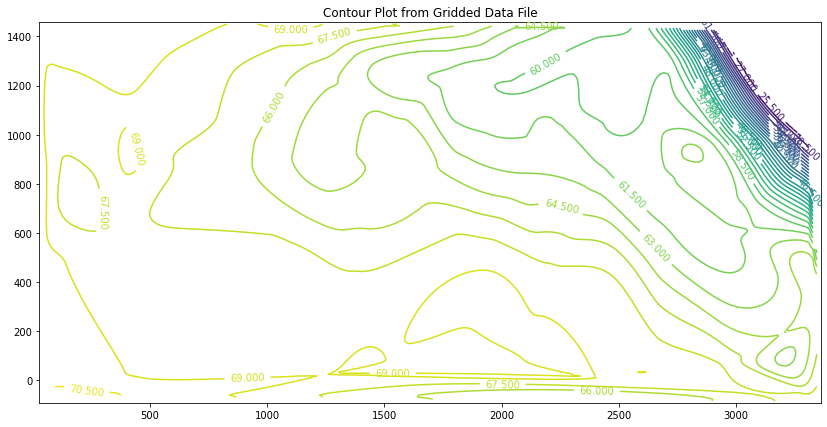

In [75]:
# CCMR from ENGR-1330:
# http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07.html
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
import pandas
my_xyz = pandas.read_csv('XYZSomewhereUSA.txt',sep='\t') # read an ascii file already prepared, delimiter is tabs
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
print(my_xyz) #examine the dataframe
import numpy 
import matplotlib
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz['X-Easting'].values.tolist()
coord_y = my_xyz['Y-Northing'].values.tolist()
coord_z = my_xyz['Z-Elevation'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 200)
lat = numpy.linspace(min(coord_y), max(coord_y), 200)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use cubic spline interpolation (other choices are nearest and linear)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 36)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')

---

<p> <a href="http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/ES-2_sample-map.png"> <img src="http://54.243.252.9/ce-3372-webroot/2-Exercises/ES2/easy-button.png" alt="EZ Button Link to ES-2 sample overlay map" style="width:42px;height:42px;"> </a> <br><br></p>